In [1]:
from moseq2_detectron_extract.io.annot import default_keypoint_names, register_datasets, read_annotations, show_dataset_info
from moseq2_detectron_extract.viz import visualize_annotations
from moseq2_detectron_extract.model.config import get_base_config, add_dataset_cfg
import cv2
from detectron2.data import MetadataCatalog
from moseq2_detectron_extract.model.model import Trainer, MoseqDatesetMapper, Predictor
import os
import datetime
import matplotlib.pyplot as plt
import random
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data.detection_utils import convert_image_to_rgb

In [2]:
annot_file = "E:\\moseq_raw_data\\unet_testing\\mask_keypoints_for_michael\\result.json"

In [3]:
annotations = read_annotations(annot_file, default_keypoint_names)
show_dataset_info(annotations)
register_datasets(annotations, default_keypoint_names)

Num Items:  472
Image size range:  ((244, 250), (240, 250))
Width: 14.88/50.50/92.82
Height: 14.88/54.78/92.33
None


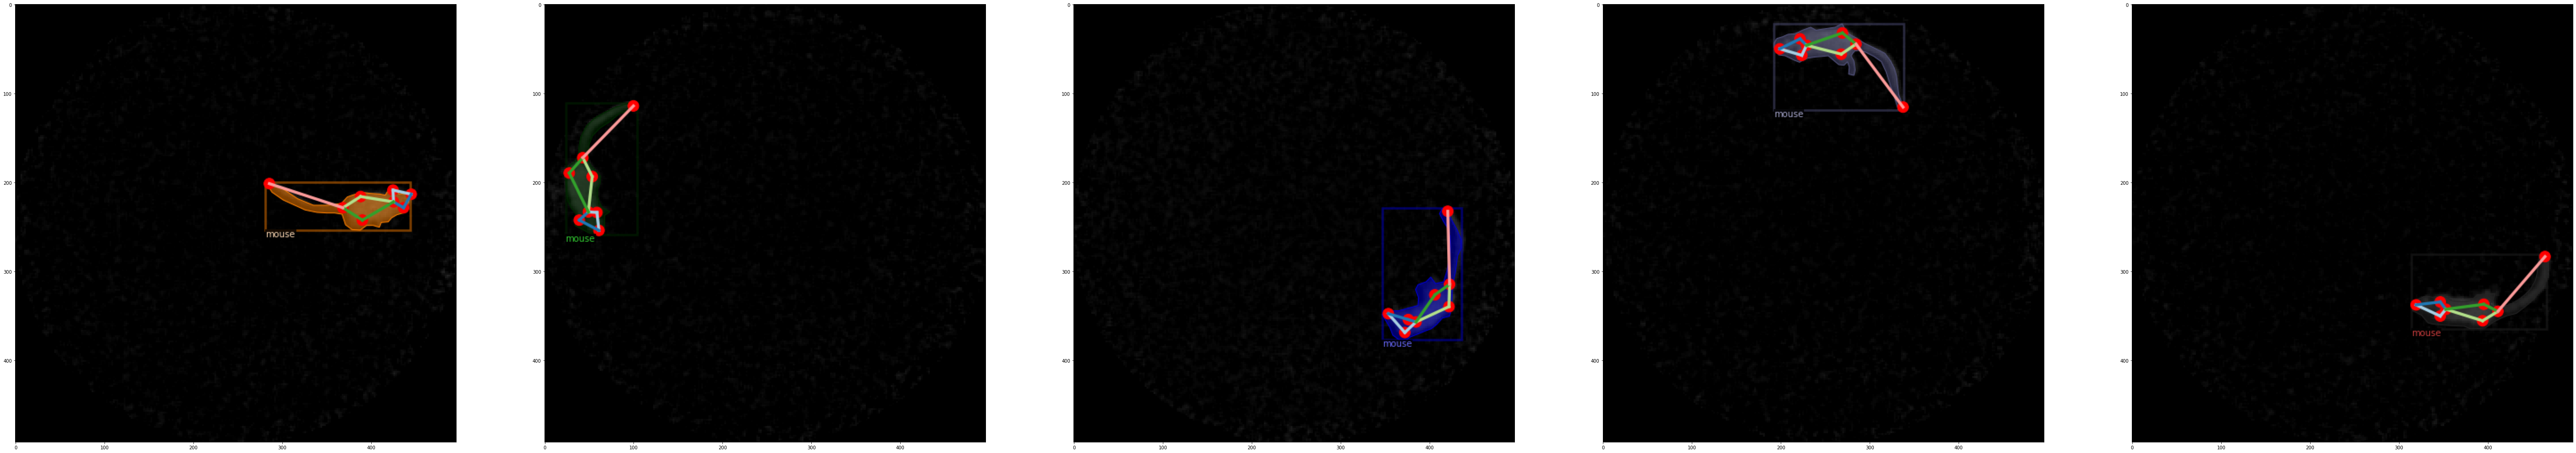

In [4]:
_, _ = visualize_annotations(annotations, MetadataCatalog.get("moseq_train"), num=5)

In [5]:
cfg = get_base_config()
cfg = add_dataset_cfg(cfg)
print(cfg)

CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 2
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('moseq_test',)
  TRAIN: ('moseq_train',)
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: L
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 250
  MAX_SIZE_TRAIN: 250
  MIN_SIZE_TEST: 240
  MIN_SIZE_TRAIN: (240,)
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: none
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES: [[32], [64], [128], [256], [512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_fpn_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: sum
    IN_FEATURES: ['res2', 'res3', 'res4', 'res5']
    NORM: 
    OU

In [6]:
cfg.OUTPUT_DIR = os.path.join(cfg.OUTPUT_DIR, datetime.datetime.now().strftime("%Y-%m-%dT%H-%M_%S"))
print("Model output: {}".format(cfg.OUTPUT_DIR))
os.makedirs(cfg.OUTPUT_DIR, exist_ok=False)
with open(os.path.join(cfg.OUTPUT_DIR, "config.yaml"), 'w') as f:
    f.write(cfg.dump())


trainer = Trainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

Model output: ./output_4\2021-06-14T15-47_09
[06/14 15:47:11 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_feature

Skip loading parameter 'backbone.bottom_up.stem.conv1.weight' to the model due to incompatible shapes: (64, 3, 7, 7) in the checkpoint but (64, 1, 7, 7) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in th

[06/14 15:47:11 d2.engine.train_loop]: Starting training from iteration 0
[06/14 15:47:18 d2.utils.events]:  eta: 0:14:20  iter: 19  total_loss: 10.04  loss_cls: 0.5617  loss_box_reg: 0.4719  loss_mask: 0.6911  loss_keypoint: 8.055  loss_rpn_cls: 0.2288  loss_rpn_loc: 0.01358  time: 0.1725  data_time: 0.1138  lr: 4.9952e-05  max_mem: 1321M
[06/14 15:47:22 d2.utils.events]:  eta: 0:14:30  iter: 39  total_loss: 9.817  loss_cls: 0.4706  loss_box_reg: 0.5251  loss_mask: 0.6605  loss_keypoint: 7.924  loss_rpn_cls: 0.1781  loss_rpn_loc: 0.00902  time: 0.1741  data_time: 0.0017  lr: 9.9902e-05  max_mem: 1321M
[06/14 15:47:26 d2.utils.events]:  eta: 0:14:39  iter: 59  total_loss: 9.624  loss_cls: 0.4675  loss_box_reg: 0.6058  loss_mask: 0.5914  loss_keypoint: 7.859  loss_rpn_cls: 0.1217  loss_rpn_loc: 0.005615  time: 0.1764  data_time: 0.0015  lr: 0.00014985  max_mem: 1321M
[06/14 15:47:29 d2.utils.events]:  eta: 0:14:40  iter: 79  total_loss: 9.432  loss_cls: 0.4271  loss_box_reg: 0.5579  los

AssertionError: [COCOEvaluator] Prediction contain 8 keypoints. Ground truth contains 8 keypoints. The length of cfg.TEST.KEYPOINT_OKS_SIGMAS is 17. They have to agree with each other. For meaning of OKS, please refer to http://cocodataset.org/#keypoints-eval.

In [7]:
cfg.OUTPUT_DIR = './output_4/2021-06-14T13-17_26'
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR,  'model_final.pth') #"model_final.pth")  # path to the model we just trained     "model_0001999.pth")#
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6  # set a custom testing threshold
cfg.TEST.DETECTIONS_PER_IMAGE = 1
predictor = Predictor(cfg)

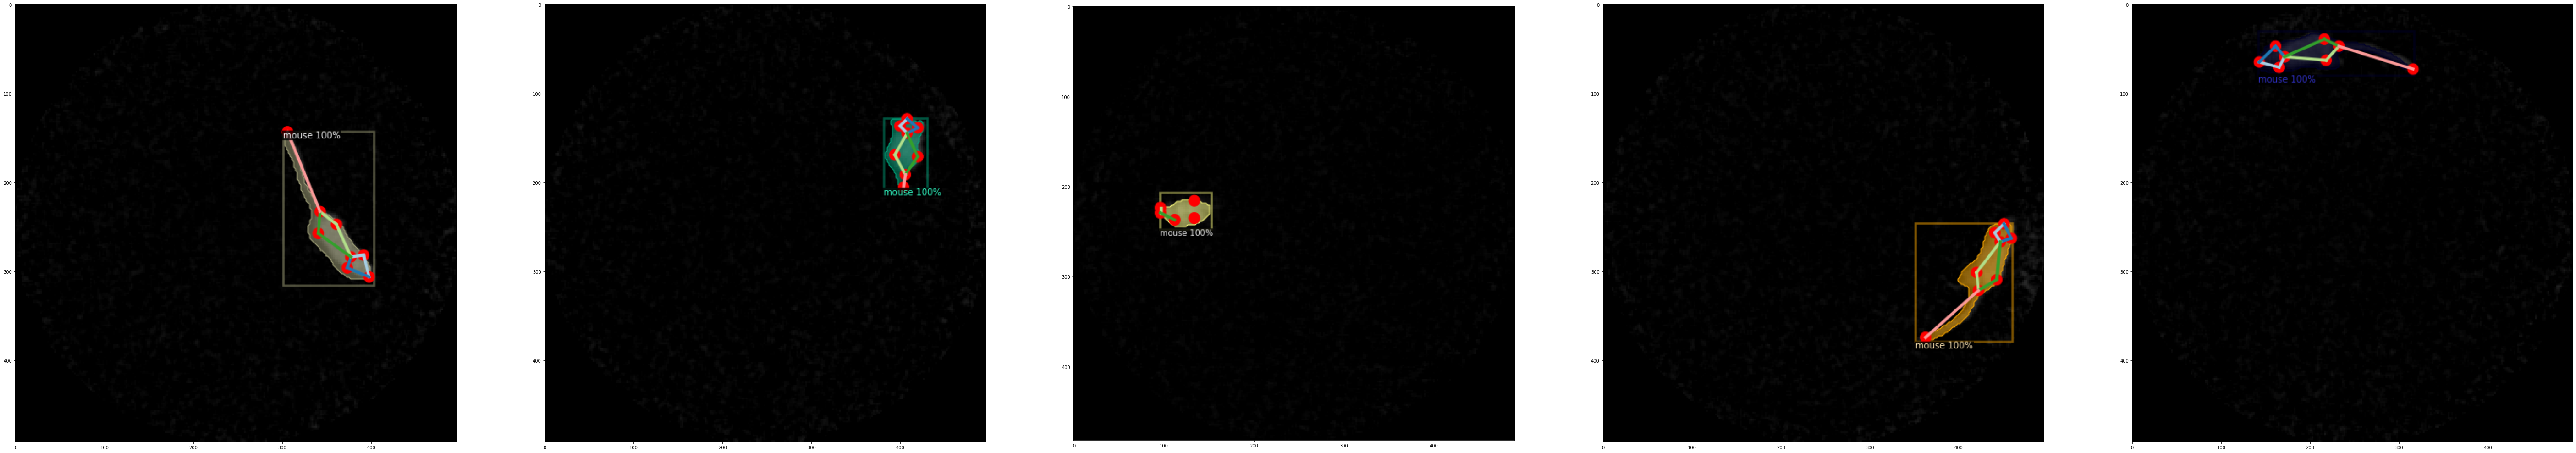

In [8]:
num = 5
fig, axs = plt.subplots(1, num, figsize=(20*num,20))
for d, ax in zip(random.sample(annotations, num), axs):
    im = cv2.imread(d["file_name"])[:,:,0,None]
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    
    v = Visualizer(convert_image_to_rgb(im, "L"),
                   metadata=MetadataCatalog.get("moseq_train"), 
                   scale=2.0, 
                   instance_mode=ColorMode.IMAGE   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    ax.imshow(out.get_image())